<a href="https://colab.research.google.com/github/2017Hk/Deep_Learning_in_physical_system/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for neural network
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential, Model, load_model
from keras.layers import  Conv1D, MaxPooling1D, AveragePooling1D, AveragePooling2D, Conv2D, MaxPooling2D, Flatten, Reshape, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, fbeta_score
from sklearn.preprocessing import MinMaxScaler
#import keras_tuner as kt
#for visualising neural network
from keras.utils import plot_model
import os


In [19]:
import shutil
shutil.rmtree('/content/data')

In [14]:
from google.colab import files
import os

# Upload the file
uploaded = files.upload()

Saving data_2.zip to data_2.zip


In [20]:
# Define the destination directory and file name
destination_directory = '/content/data'
file_name = 'data_2.zip'  # Change this to your desired file name

os.makedirs(destination_directory, exist_ok=True)

In [21]:
!unzip -q {os.path.join('/content', file_name)} -d {destination_directory}

In [16]:
# Define a function to extract data
def read_data(filename):

    data = []
    with open(filename, 'r') as f:
        for line in f:

            # Split the line by spaces and convert each value to float
            line_data = [float(value) for value in line.strip().split()]
            data.append(line_data)
    return data

In [22]:
import os

# Set the directory path
directory_path = '/content/data'

# List all items in the directory
items = os.listdir(directory_path)

# Filter out only the files
files = [f for f in items if os.path.isfile(os.path.join(directory_path, f))]

# Count the number of files
number_of_files = len(files)
print(f"Number of files in '{directory_path}': {number_of_files}")


Number of files in '/content/data': 2000


In [23]:
# Displacement data set
folder_path = '/content/data'
# Input data
diplacement_list=[]
for i in range(0,number_of_files//2):
    file_path = os.path.join(folder_path, f'displacement ({i})')               # Calling file displacement data
    data=read_data(file_path)



    diplacement_list.append(data)

displacement_array = np.array(diplacement_list)
displacement_array=displacement_array.reshape(displacement_array.shape[0],displacement_array.shape[1])
print(displacement_array.shape)

(1000, 1681)


In [24]:
# Property data set
# Labels

prop_list=[]

for i in range(0,number_of_files//2):
    file_path = os.path.join(folder_path, f'prop.dat ({i})')               # Calling file prop.dat data
    data=read_data(file_path)



    prop_list.append(data[1:401])

prop_array=np.array(prop_list)
prop_array=prop_array.reshape(prop_array.shape[0],prop_array.shape[1])

print(prop_array.shape)

(1000, 400)


In [29]:
# Calculate variance for each feature
print('variance of the data to under the data')
print('Property data :',prop_array.var())
print('Displacement data :',displacement_array.var())

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler_prop = MinMaxScaler()
scaler_displacement = MinMaxScaler()


# Fit the scaler to the data and transform it
normalized_prop = scaler_prop.fit_transform(prop_array)
normalized_displacement = scaler_prop.fit_transform(displacement_array)

# Calculate variance for each feature
print('variance of the normalized data to under the data')
print('Property data :',normalized_prop.var())
print('Displacement data :',normalized_displacement.var())

variance of the data to under the data
Property data : 4.364658632650297e+20
Displacement data : 2.7140488914229176e-08
variance of the normalized data to under the data
Property data : 0.185659140975
Displacement data : 0.0


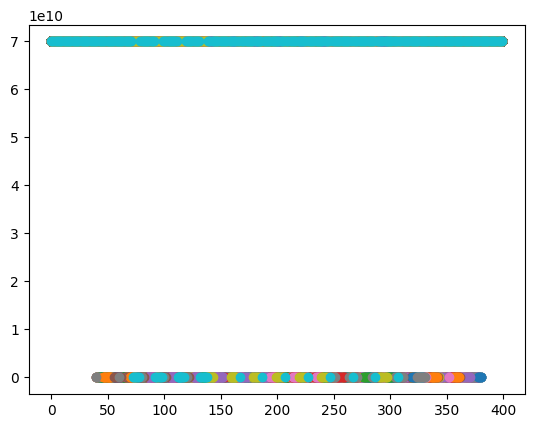

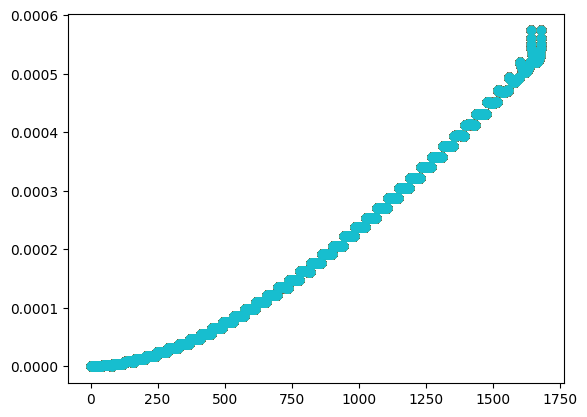

In [30]:
# prompt: random number between 0,n

import random
import matplotlib.pyplot as plt

for i in range(number_of_files//2):
# ran = random.randint(0, number_of_files//2)
  plt.scatter(range(400),prop_array[i,:]),
plt.show()

for i in range(number_of_files//2):
# ran = random.randint(0, number_of_files//2)
  plt.scatter(range(1681),displacement_array[i,:]),
plt.show()
# prompt: random number between 0,n


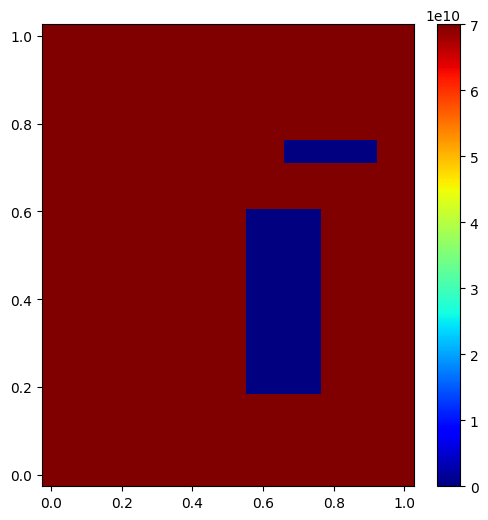

989


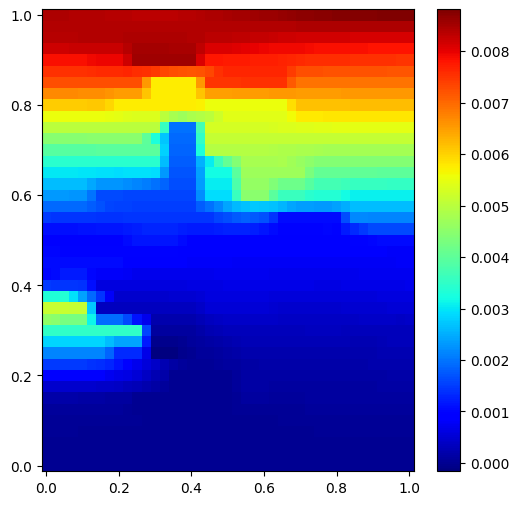

989


In [9]:
ran = random.randint(0, number_of_files//2)

# Create a 20x20 grid of data
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

# Create a 20x20 plot
fig1, ax1 = plt.subplots(figsize=(6, 6))

# Plot the data
p = ax1.pcolormesh(X, Y, prop_array[ran,:].reshape(20,20), cmap='jet')

# Set the colorbar
plt.colorbar(p)

# Show the plot
plt.show()
print(ran)
# prompt: random number between 0,n

# Create a 41x41 grid of data
x = np.linspace(0, 1, 41)
y = np.linspace(0, 1, 41)
X, Y = np.meshgrid(x, y)

# Create a 20x20 plot
fig1, ax1 = plt.subplots(figsize=(6, 6))

# Plot the data
p1 = ax1.pcolormesh(X, Y, displacement_array[ran,:].reshape(41,41), cmap='jet')

# Set the colorbar
plt.colorbar(p1)

# Show the plot
plt.show()
print(ran)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(displacement_array, prop_array, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1681), (6, 1681), (24, 400), (6, 400))

In [ ]:
X_train_2d = X_train.reshape(X_train.shape[0],41,41)
X_test_2d = X_test.reshape(X_test.shape[0],41,41)

In [ ]:
def custom_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [ ]:
def custom_mae(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

In [ ]:
# Define the custom huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    error = y_true - y_pred
    abs_error = tf.abs(error)
    quadratic_part = tf.minimum(abs_error, delta)
    linear_part = abs_error - quadratic_part
    return tf.reduce_mean(0.5 * tf.square(quadratic_part) + delta * linear_part)

Evalution Metrics

In [ ]:
# Define the custom R2 metric function
def r2_metric(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (SS_res / (SS_tot + tf.keras.backend.epsilon()))

In [ ]:
def custom_mape(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    error = tf.abs((y_true - y_pred) / tf.maximum(tf.abs(y_true), tf.keras.backend.epsilon()))
    return 100. * tf.reduce_mean(error)

In [ ]:
def custom_normalized_l2_norm(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    error = y_true - y_pred
    l2_norm = tf.norm(error, ord='euclidean')
    l2_norm = l2_norm/tf.maximum(tf.norm(y_true, ord='euclidean'), tf.keras.backend.epsilon())
    return l2_norm

In [ ]:
def custom_relu(x):
    return tf.maximum(0.0, x)

In [ ]:
def custom_tanh(x):
    return (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

In [ ]:
def custom_sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [ ]:
def custom_activation(x):
    return tf.square(x)

In [ ]:
# Define custom evaluation metrics
def precision(y_true, y_pred):
    return precision_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

def recall(y_true, y_pred):
    return recall_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

def f1(y_true, y_pred):
    return f1_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

def hamming(y_true, y_pred):
    return hamming_loss(y_true, y_pred)

def jaccard(y_true, y_pred):
    return jaccard_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

## Regression Model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3200)              5382400   
                                                                 
 dense_1 (Dense)             (None, 6400)              20486400  
                                                                 
 dense_2 (Dense)             (None, 12800)             81932800  
                                                                 
 dense_3 (Dense)             (None, 400)               5120400   
                                                                 
Total params: 112922000 (430.76 MB)
Trainable params: 112922000 (430.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


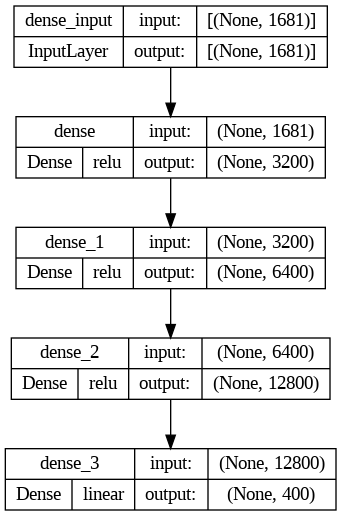

In [ ]:
# Clear existing model
tf.keras.backend.clear_session()

# #define model
network1d = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3200, activation='relu', input_shape=(X_train.shape[1],)),  # Assuming CustomDense is Dense with 25600 units
    tf.keras.layers.Dense(units=6400, activation='relu', input_shape=(3200,)),
    tf.keras.layers.Dense(units=12800, activation='relu', input_shape=(6400,)),
    tf.keras.layers.Dense(units=y_train.shape[1])
])
network1d.summary()
#visulize model
plot_model(network1d, show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [ ]:
num_epochs = 30;
# Define the initial learning rate and optimizer
initial_learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Define the learning rate schedule function
def lr_schedule(epoch):
    if epoch < 10:
        return initial_learning_rate
    elif 10 <= epoch < 20:
        return initial_learning_rate * 0.1
    else:
        return initial_learning_rate * 0.01

# Compile the model
# Compile the model
network1d.compile(optimizer=optimizer,
              loss=[custom_mse],  # Binary cross-entropy loss

              metrics=[r2_metric,          # Accuracy
                       custom_mape,  # Precision
                       custom_normalized_l2_norm        # ROC-AUC Score
                      ])

# Create training and validation datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_size = int(0.2 * len(train_dataset))
train_dataset_shuffled = train_dataset.shuffle(buffer_size=len(train_dataset))
validation_dataset = train_dataset_shuffled.take(validation_size).batch(32)
train_dataset_final = train_dataset_shuffled.skip(validation_size).batch(32)

# Define callbacks for learning rate scheduling
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Train the model
history = network1d.fit(train_dataset_final, epochs=num_epochs, validation_data=validation_dataset, callbacks=[lr_scheduler])


Epoch 1/30
54/54 [==============================] - 160s 3s/step - loss: 71458484754841600.0000 - r2_metric: 0.9998 - custom_mape: 10573533184.0000 - custom_normalized_l2_norm: 0.0084 - val_loss: 1496235877859328.0000 - val_r2_metric: 1.0000 - val_custom_mape: 2888219136.0000 - val_custom_normalized_l2_norm: 0.0017 - lr: 0.0100
Epoch 2/30
54/54 [==============================] - 128s 2s/step - loss: 267440936189952.0000 - r2_metric: 1.0000 - custom_mape: 693699520.0000 - custom_normalized_l2_norm: 5.6946e-04 - val_loss: 4240864444416.0000 - val_r2_metric: 1.0000 - val_custom_mape: 157371792.0000 - val_custom_normalized_l2_norm: 9.1890e-05 - lr: 0.0100
Epoch 3/30
54/54 [==============================] - 125s 2s/step - loss: 1130699554816.0000 - r2_metric: 1.0000 - custom_mape: 43634332.0000 - custom_normalized_l2_norm: 3.7676e-05 - val_loss: 39236423680.0000 - val_r2_metric: 1.0000 - val_custom_mape: 10798481.0000 - val_custom_normalized_l2_norm: 8.8387e-06 - lr: 0.0100
Epoch 4/30
54/54

In [ ]:
num_epochs = 30;
# Define the initial learning rate and optimizer
initial_learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Define the learning rate schedule function
def lr_schedule(epoch):
    if epoch < 10:
        return initial_learning_rate
    elif 10 <= epoch < 20:
        return initial_learning_rate * 0.1
    else:
        return initial_learning_rate * 0.01

# Compile the model
# Compile the model
network1d.compile(optimizer=optimizer,
              loss=[huber_loss],  # Binary cross-entropy loss

              metrics=[r2_metric,          # Accuracy
                       custom_mape,  # Precision
                       custom_normalized_l2_norm        # ROC-AUC Score
                      ])

# Create training and validation datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_size = int(0.2 * len(train_dataset))
train_dataset_shuffled = train_dataset.shuffle(buffer_size=len(train_dataset))
validation_dataset = train_dataset_shuffled.take(validation_size).batch(32)
train_dataset_final = train_dataset_shuffled.skip(validation_size).batch(32)

# Define callbacks for learning rate scheduling
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Train the model
history = network1d.fit(train_dataset_final, epochs=num_epochs, validation_data=validation_dataset, callbacks=[lr_scheduler])


Epoch 1/30
54/54 [==============================] - 132s 2s/step - loss: 177663264.0000 - r2_metric: 0.9998 - custom_mape: 11624236032.0000 - custom_normalized_l2_norm: 0.0117 - val_loss: 103464264.0000 - val_r2_metric: 1.0000 - val_custom_mape: 7778787840.0000 - val_custom_normalized_l2_norm: 0.0061 - lr: 0.0100
Epoch 2/30
54/54 [==============================] - 125s 2s/step - loss: 90679056.0000 - r2_metric: 1.0000 - custom_mape: 6896983040.0000 - custom_normalized_l2_norm: 0.0055 - val_loss: 96702576.0000 - val_r2_metric: 1.0000 - val_custom_mape: 8215806464.0000 - val_custom_normalized_l2_norm: 0.0055 - lr: 0.0100
Epoch 3/30
54/54 [==============================] - 124s 2s/step - loss: 89773568.0000 - r2_metric: 1.0000 - custom_mape: 6411271680.0000 - custom_normalized_l2_norm: 0.0056 - val_loss: 78603216.0000 - val_r2_metric: 1.0000 - val_custom_mape: 5607425024.0000 - val_custom_normalized_l2_norm: 0.0053 - lr: 0.0100
Epoch 4/30
54/54 [==============================] - 124s 2s/s

## CNN

In [ ]:
X_train_cnn = X_train.reshape((-1, X_train.shape[1], 1))  # Reshape for CNN

In [ ]:
X_train_cnn.shape

(2158, 1681, 1)

In [ ]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=( X_train_2d.shape[1], X_train_2d.shape[2],1)),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.AveragePooling2D(2,2),
    # layers.Conv2D(128, (3,3), activation='relu'),
    # layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid')
])


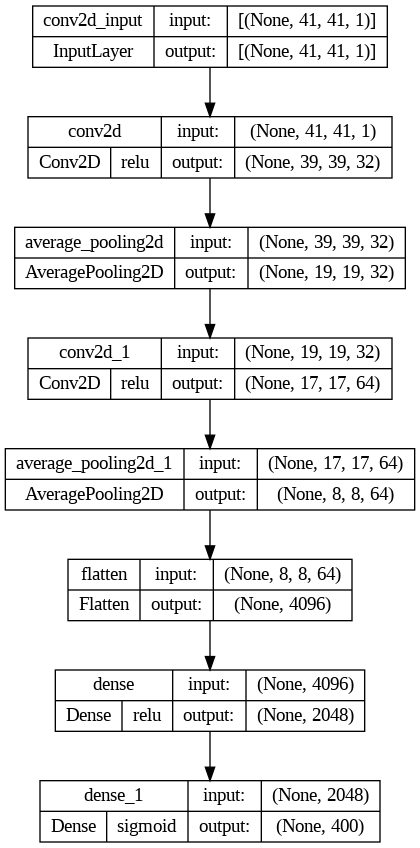

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score, precision_score, recall_score, f1_score, jaccard_score

def custom_metrics(y_true, y_pred):
    y_pred_binary = tf.round(y_pred)  # Convert probabilities to binary predictions
    hamming = hamming_loss(y_true, y_pred_binary)
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary, average='samples')
    recall = recall_score(y_true, y_pred_binary, average='samples')
    f1 = f1_score(y_true, y_pred_binary, average='samples')
    jaccard = jaccard_score(y_true, y_pred_binary, average='samples')
    return {'hamming_loss': hamming, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1, 'jaccard_similarity': jaccard}

In [ ]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score, hamming_loss, precision_score

# Custom callback to compute additional metrics
class Metrics(Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Compute predictions
        y_pred_prob = self.model.predict(self.validation_data[0])
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_true = np.argmax(self.validation_data[1], axis=1)

        # Calculate metrics
        f1 = f1_score(y_true, y_pred, average='macro')
        hamming = hamming_loss(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')

        # Print metrics
        print(f'\nEpoch {epoch+1}:')
        print(f' - val_f1: {f1:.4f}')
        print(f' - val_hamming_loss: {hamming:.4f}')
        print(f' - val_precision: {precision:.4f}')

In [ ]:
num_epochs = 30;
# Define the initial learning rate and optimizer
initial_learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Define the learning rate schedule function
def lr_schedule(epoch):
    if epoch < 10:
        return initial_learning_rate
    elif 10 <= epoch < 20:
        return initial_learning_rate * 0.1
    else:
        return initial_learning_rate * 0.01

# Compile the model
# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create training and validation datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_2d, y_train))
validation_size = int(0.2 * len(train_dataset))
train_dataset_shuffled = train_dataset.shuffle(buffer_size=len(train_dataset))
validation_dataset = train_dataset_shuffled.take(validation_size).batch(32)
train_dataset_final = train_dataset_shuffled.skip(validation_size).batch(32)

# Define callbacks for learning rate scheduling
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)
# Train the model with the custom callback
# metrics_callback = Metrics()

# Train the model
history = model.fit(train_dataset_final, epochs=num_epochs, validation_data=validation_dataset, callbacks=[lr_scheduler])

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 153207791681536.0000 - accuracy: 0.0000e+00 - val_loss: 153194772561920.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/30
1/1 [==============================] - 0s 256ms/step - loss: 153896630616064.0000 - accuracy: 0.0000e+00 - val_loss: 166484290568192.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/30
1/1 [==============================] - 0s 289ms/step - loss: 162596137205760.0000 - accuracy: 0.0000e+00 - val_loss: 227999379095552.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/30
1/1 [==============================] - 0s 251ms/step - loss: 227334363807744.0000 - accuracy: 0.0000e+00 - val_loss: 461195265966080.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 5/30
1/1 [==============================] - 0s 295ms/step - loss: 450863218819072.0000 - accuracy: 0.0000e+00 - val_loss: 856166699630592.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 6/30
1/1 [==============================] - 0s 190ms

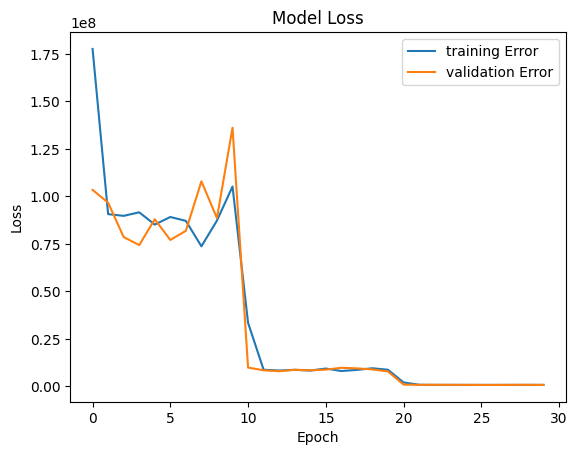

In [ ]:
# Plot the training history
# Plot the training history
plt.plot(history.history['loss'],  label='training Error')
plt.plot(history.history['val_loss'],  label='validation Error')
plt.title('Model Loss')
plt.ylabel('Loss')
# plt.ylim(0, 0.001)
plt.legend()
plt.xlabel('Epoch')
plt.show()

In [ ]:
# model_json = network1d.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# network1d.save_weights("model.h5")
# print("Saved model to disk")


Saved model to disk


In [ ]:
test_loss = model.evaluate(X_test_2d.reshape(540,41,41,1),y_test,verbose=0)
ypredict = model.predict(X_test.reshape(540,41,41,1),verbose=0)
print("Test Loss:", test_loss)

Test Loss: [nan, 1.0]


In [ ]:
ypred45 = ypredict[45,:].reshape(20,20)

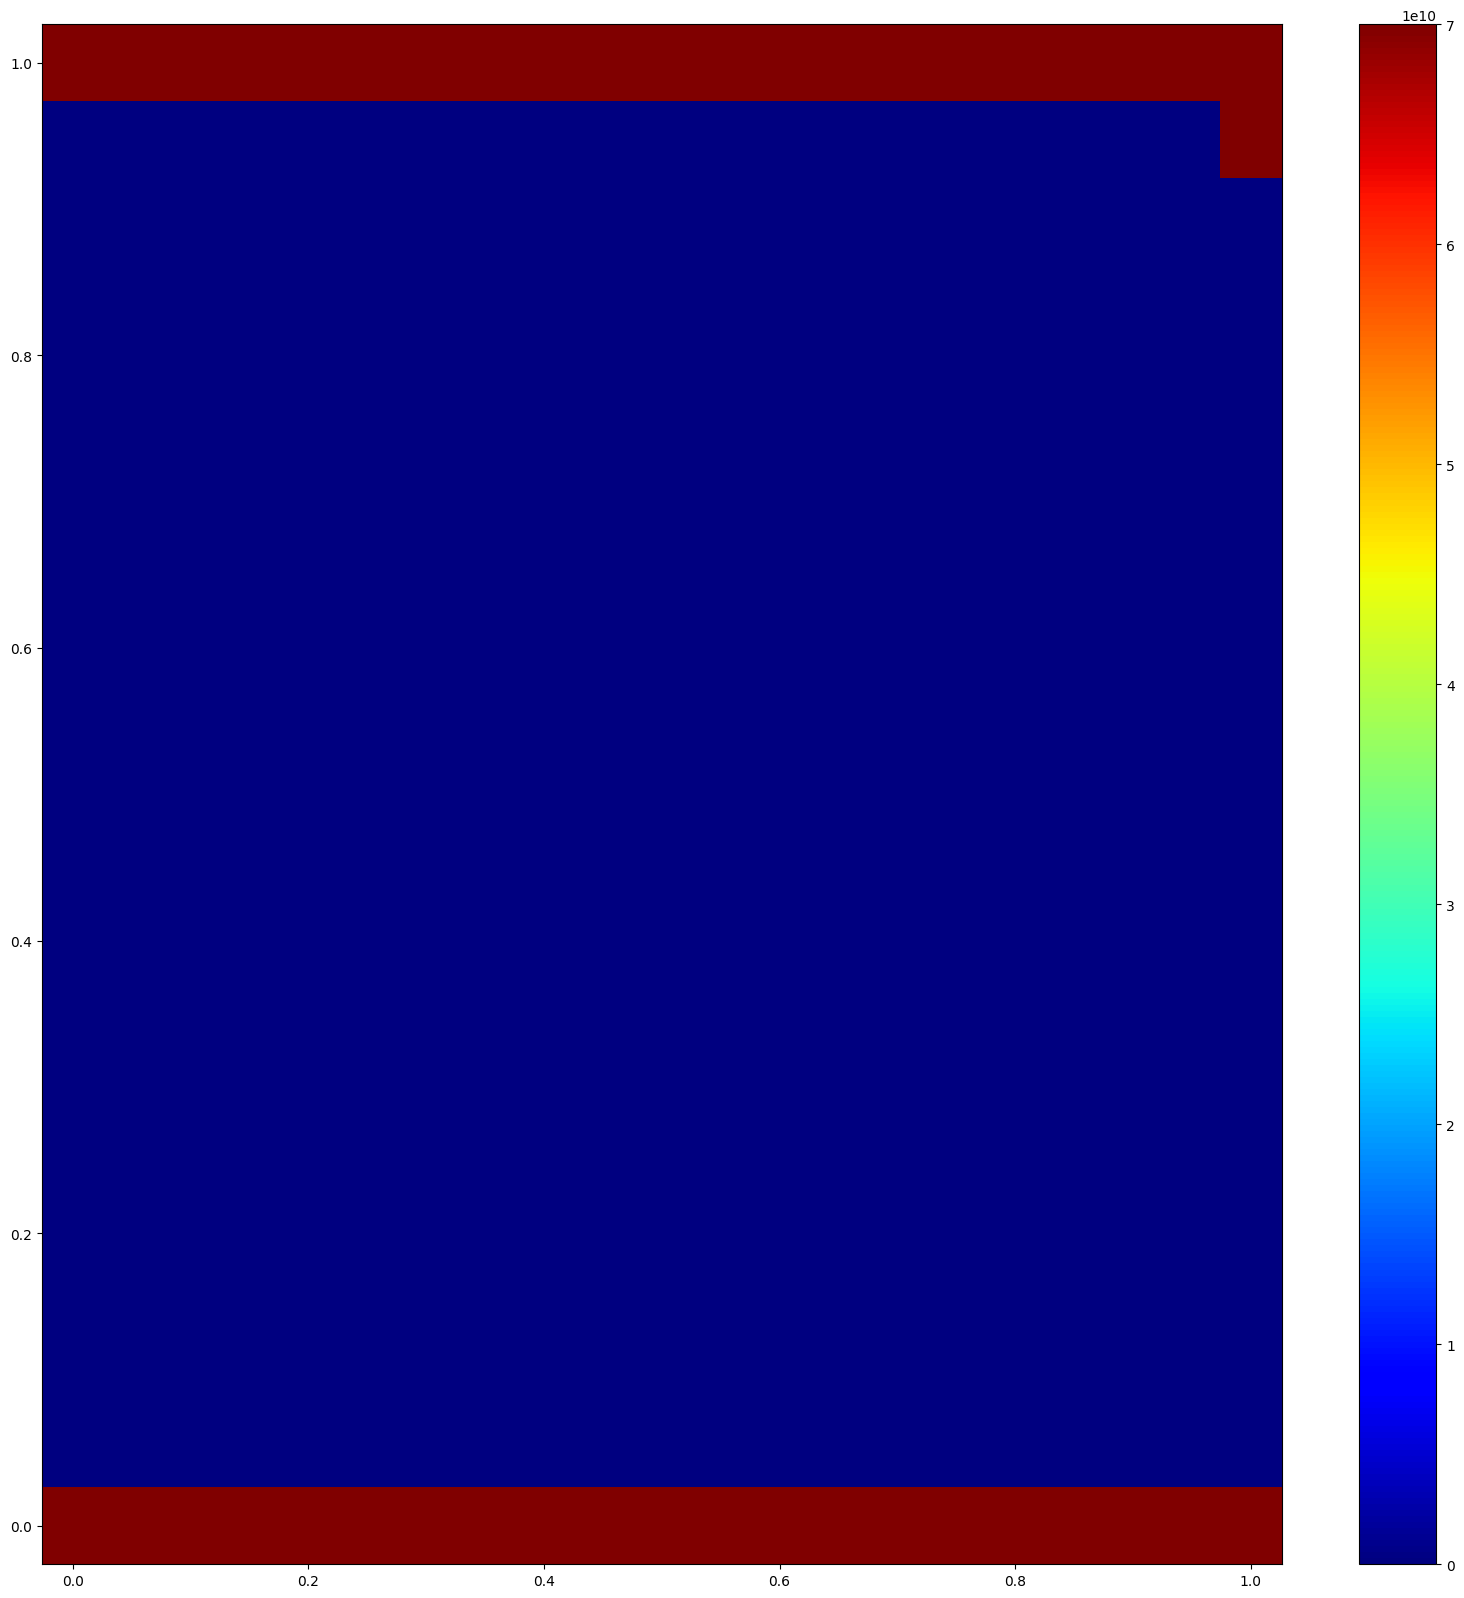

In [ ]:
import matplotlib.pyplot as plt

# Create a 20x20 grid of data
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

# Create a 20x20 plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the data
p = ax.pcolormesh(X, Y, y_test[45,:].reshape(20,20), cmap='jet')

# Set the colorbar
plt.colorbar(p)

# Show the plot
plt.show()

In [ ]:
Z.shape

(20, 20)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, hamming_loss, jaccard_score

# Define the custom R2 metric function
# Define custom evaluation metrics
def precision(y_true, y_pred):
    return precision_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

def recall(y_true, y_pred):
    return recall_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

def f1(y_true, y_pred):
    return f1_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

def hamming(y_true, y_pred):
    return hamming_loss(y_true, y_pred)

def jaccard(y_true, y_pred):
    return jaccard_score(tf.reshape(y_true, (-1,)), tf.cast(tf.reshape(y_pred > 0.5, tf.float32), tf.int32))

def confusion_matrix_metric(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    confusion = tf.math.confusion_matrix(tf.reshape(y_true, (-1,)), tf.reshape(y_pred, (-1,)))
    return tf.reshape(confusion, (2, 2))

In [ ]:
y_test(1,1)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# print("Recall :", recall(y_test,ypredict))
print("F1 score :", f1(y_test,ypredict))
# print("humming loss :", humming(y_test,ypredict))
print("Confusion_matrix:", confusion_matrix_metric(y_test,ypredict))

ValueError: Attempt to convert a value (tf.float32) with an unsupported type (<class 'tensorflow.python.framework.dtypes.DType'>) to a Tensor.

In [ ]:
num_zeros_per_row_predict = np.zeros(ypredict.shape[0]);
num_zeros_per_row_actual = np.zeros(ypredict.shape[0]);
for i in range(ypredict.shape[0]):
    num_zeros_per_row_predict[i] = np.sum(np.array(ypredict[i,:]) == 0)
    num_zeros_per_row_actual[i] = np.sum(np.array(y_test[i,:]) == 0)



# zero_indices_per_row = [np.where(row == 0)[0] for row in array]

# print("Number of zeros in each row:", num_zeros_per_row)
# print("Indices of zeros in each row:", zero_indices_per_row)

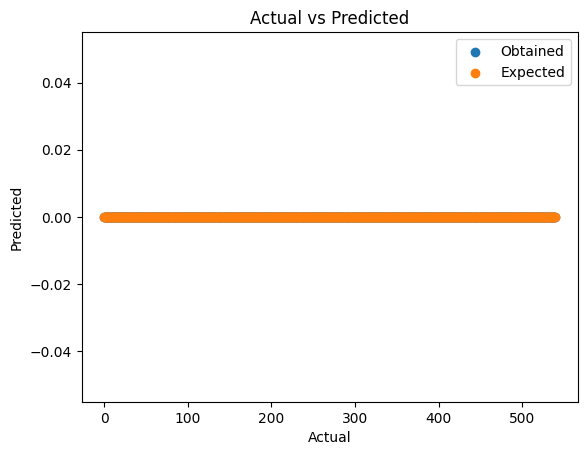

In [ ]:
plt.scatter(range(ypredict.shape[0]),num_zeros_per_row_predict, label='Obtained')
plt.scatter(range(ypredict.shape[0]),num_zeros_per_row_actual, label='Expected')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

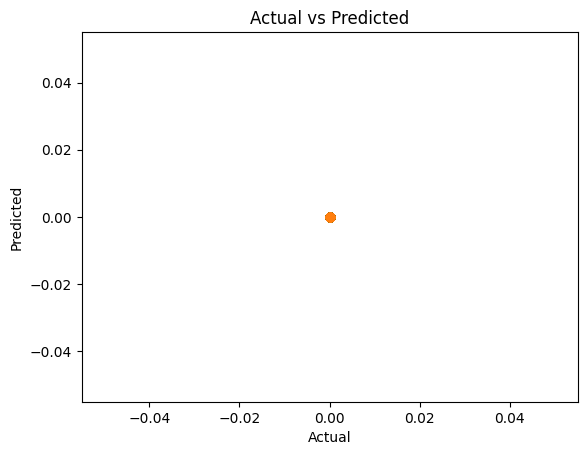

In [ ]:
plt.scatter(num_zeros_per_row_actual,num_zeros_per_row_predict, label='Obtained')
plt.scatter(num_zeros_per_row_actual,num_zeros_per_row_actual, label='Expected')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()